# Clinical trials and deaths factors

Sources:
- https://data.cdc.gov/NCHS/Conditions-contributing-to-deaths-involving-corona/hk9y-quqm
- https://www.kaggle.com/parulpandey/covid19-clinical-trials-dataset?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import torch

In [31]:
df = pd.read_csv('../data/Conditions_contributing_to_deaths_involving_coronavirus_disease_2019__COVID-19___by_age_group__United_States..csv')
df = df[df.Condition != 'Coronavirus Disease 2019']
df.head()

,Data as of,Start Week,End Week,Condition Group,Condition,ICD10_codes,All ages,0-24 years,25-34 years,35-44 years,45-54 years,55-64 years,65-74 years,75-84 years,85 years and over
1,07/05/2020,02/01/2020,07/04/2020,Respiratory diseases,Influenza and pneumonia,J09-J18,47050,62,360,871,2552,6179,10351,12604,14069
2,07/05/2020,02/01/2020,07/04/2020,Respiratory diseases,Chronic lower respiratory diseases,J40-J47,9396,10,40,82,278,1028,2169,2936,2852
3,07/05/2020,02/01/2020,07/04/2020,Respiratory diseases,Adult respiratory distress syndrome,J80,16095,41,155,413,1246,2648,4205,3991,3394
4,07/05/2020,02/01/2020,07/04/2020,Respiratory diseases,Respiratory failure,J96,38327,48,255,640,1922,4767,8564,10628,11501
5,07/05/2020,02/01/2020,07/04/2020,Respiratory diseases,Respiratory arrest,R09.2,2405,1,13,37,109,249,484,655,857


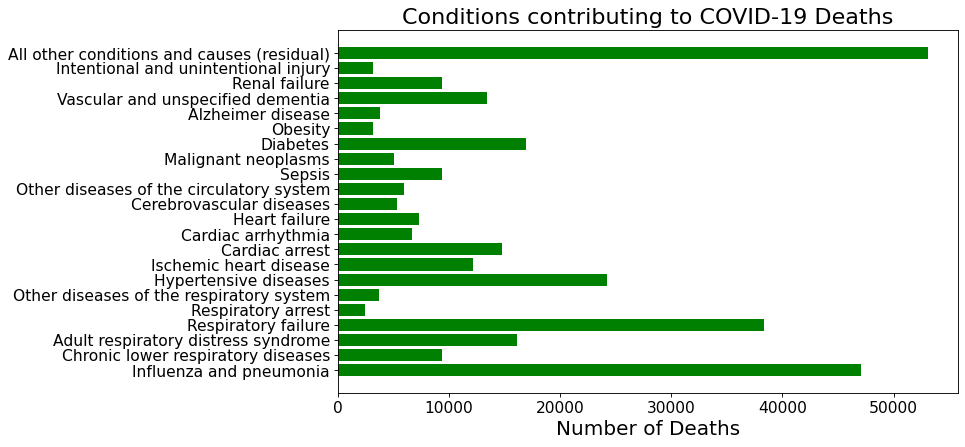

In [49]:
x = list(df['Condition'].values)
x[-2] = x[-2].split(', ')[0]
deaths = list(df['All ages'].values)
x_pos = [i for i, _ in enumerate(x)]

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.barh(x_pos, deaths, color='green')
plt.xlabel("Number of Deaths", fontsize=18)
plt.title("Conditions contributing to COVID-19 Deaths", fontsize=20)
plt.yticks(x_pos, x, fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('deaths_conditions.svg', format='svg', bbox_inches='tight')
plt.show()

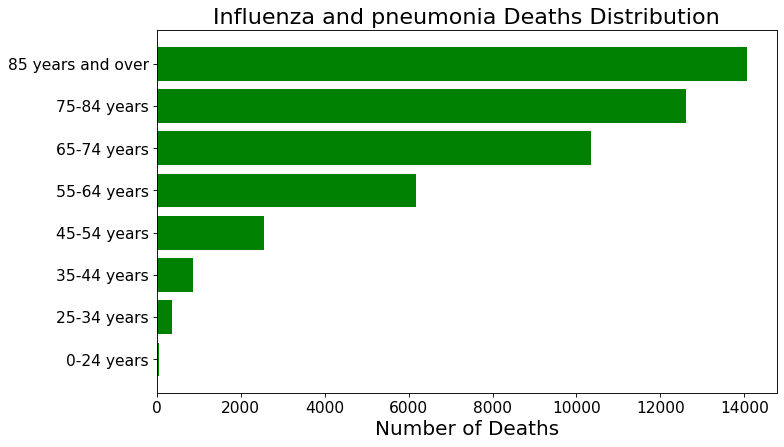

In [50]:
x = list(df.columns)[7:]
deaths = list(df[df.Condition == 'Influenza and pneumonia'].values[0][7:])
x_pos = [i for i, _ in enumerate(x)]

plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.barh(x_pos, deaths, color='green')
plt.xlabel("Number of Deaths", fontsize=18)
plt.title("Influenza and pneumonia Deaths Distribution", fontsize=20)
plt.yticks(x_pos, x, fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('deaths_top.svg', format='svg', bbox_inches='tight')
plt.show()